# Assignment_4

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
df=pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [13]:
# Select the features and target variable
X = df[['RM', 'LSTAT']]
y = df['MEDV']

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [15]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [16]:
regressor = LinearRegression()

# Train the model using the imputed training sets
regressor.fit(X_train_imputed, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test_imputed)
y_pred

array([25.46727085, 30.79469927, 17.47283386, 25.58122754, 19.77321773,
       22.89348458, 16.91611038, 14.87124458, 22.05716581, 20.00220033,
       17.37924953, 18.18422897, -2.48726378, 22.39691795, 19.73523096,
       26.63251769, 17.17020564,  3.46700587, 37.58731671, 18.60311243,
       22.35817744, 26.97393711, 13.15746692, 24.39715326, 19.04746656,
       14.21871828, 20.24411186, 21.38671292, 17.82666007, 18.7962805 ,
       17.15505389, 26.64439006, 27.97173906, 18.67962541, 15.61122993,
       17.27720313, 32.95693578, 21.84538129, 20.01516294, 22.38705812,
       12.17996129, 28.88694096, 38.56047345, 18.25548353, 25.61296672,
       16.49729008, 15.6736266 , 26.88441123, 19.61849984, 28.85556382,
       20.54307735, 31.36284026, 17.99581407, 28.40899522, 35.13239598,
       23.92969891, 19.73635489, 31.51131055, 24.95847413, 15.05219946,
       27.18597426, 32.85209806, 29.46489563, 18.31006216, 28.56841157,
       10.72798307, 20.8695173 , 26.22015565, 29.37259533, 16.86

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 31.525200066083162
Mean Absolute Error: 3.883341629675267


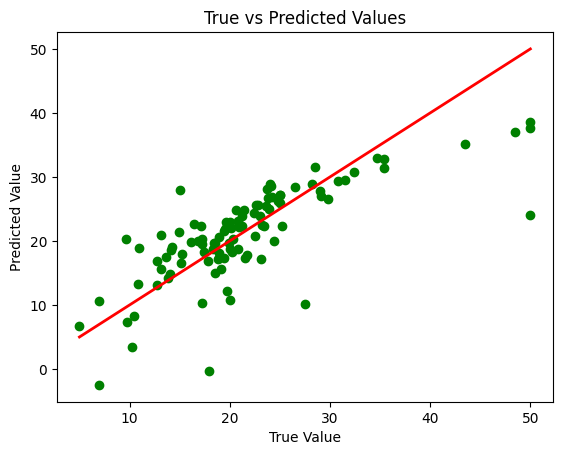

In [19]:
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=2)  # Regression line
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("True vs Predicted Values")
plt.show()